<a href="https://colab.research.google.com/github/Anushree-B/web-scraping/blob/main/project_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## webscraping

In [ ]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# saving the url to scrape in url variable

url = r"https://byjus.com/maths/math-symbols/"

In [ ]:
# creating response variable

response = get(url)
print(response)

<Response [200]>


As the response is 200, so, we can scrape the website.

In [ ]:
# creating a beutiful soup object to parse the website

soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
# printing the soup to check if data is scraped successfully

print(soup)

In [ ]:
# as all the data that we want is in table tag, thus we will get all the tables

tables = soup.find_all('table')

In [ ]:
# now, we will extract all the data from the tr and td tag and create a dataframe of all the data

for i, table in enumerate(tables):
  table_data = []
  rows = table.find_all('tr')
  maxcols = 0

  for row in rows:
    row_data = [cell.text.strip() for cell in row.find_all(['th', 'td'])]
    table_data.append(row_data)
    maxcols = max(maxcols, len(row_data))

  # Fill in missing values to ensure consistent number of columns
  table_data = [row + [''] * (maxcols - len(row)) for row in table_data]

  # Create a DataFrame
  df_name = f'df{i + 1}'
  globals()[df_name] = pd.DataFrame(table_data[1:], columns=table_data[0])

In [ ]:
df1

,Symbol,Symbol Name in Maths,Math Symbols Meaning,Example
0,≠,not equal sign,inequality,10 ≠ 6
1,=,equal sign,equality,3 = 1 + 2
2,<,strict inequality,less than,7 < 10
3,>,strict inequality,greater than,6 > 2
4,≤,inequality,less than or equal to,"x ≤ y, means, y = x or y > x, but not vice-versa."
5,≥,inequality,greater than or equal to,"a ≥ b, means, a = b or a > b, but vice-versa d..."
6,[ ],brackets,calculate expression inside first,[ 2×5] + 7 = 10 + 7 = 17
7,( ),parentheses,calculate expression inside first,3 × (3 + 7) = 3 × 10 = 30
8,−,minus sign,subtraction,5 − 2 = 3
9,+,plus sign,addition,4 + 5 = 9


In [ ]:
df2

,Symbol,Symbol Name in Maths,Math Symbols Meaning,Example
0,^,caret / circumflex,and,x ^ y
1,·,and,and,x · y
2,+,plus,or,x + y
3,&,ampersand,and,x & y
4,|,vertical line,or,x | y
5,∨,reversed caret,or,x ∨ y
6,X̄,bar,not – negation,x̄
7,x’,single-quote,not – negation,x’
8,!,Exclamation mark,not – negation,! x
9,¬,not,not – negation,¬ x


In [ ]:
df3

,Symbol,Symbol Name in Maths,Math Symbols Meaning,Example
0,ε,epsilon,"represents a very small number, near-zero",ε → 0
1,limx→a,limit,limit value of a function,limx→a(3x+1)= 3 × a + 1 = 3a + 1
2,y ‘,derivative,derivative – Lagrange’s notation,(5x3)’ = 15x2
3,e,e constant / Euler’s number,e = 2.718281828…,"e = lim (1+1/x)x , x→∞"
4,y(n),nth derivative,n times derivation,nth derivative of 3xn = 3 n (n-1)(n-2)….(2)(1)...
5,y”,second derivative,derivative of derivative,(4x3)” = 24x
6,\(\begin{array}{l}\frac{d^2 y}{d x^2}\end{arra...,second derivative,derivative of derivative,\(\begin{array}{l}\frac{d^2 }{d x^2}(6x^{3}+x^...
7,dy/dx,derivative,derivative – Leibniz’s notation,\(\begin{array}{l}\frac{d }{d x}(5x) = 5\end{a...
8,\(\begin{array}{l}\frac{d^n y}{d x^n}\end{arra...,nth derivative,n times derivation,\(\begin{array}{l}\frac{d^{n}x}{dx^{n}}(x^{n})...
9,\(\begin{array}{l}\ddot{y}= \frac{d^{2} y}{dt^...,Second derivative of time,derivative of derivative,"If y = 4t2, then\n\(\begin{array}{l}\ddot{y}= ..."


In [ ]:
df3['Symbol'][6]

'\\(\\begin{array}{l}\\frac{d^2 y}{d x^2}\\end{array} \\)'

In [ ]:
df5

,Symbol,Symbol Name,Meaning or Definition,Example
0,nPk,Permutation,\(\begin{array}{l}^{n}P_{k}= \frac{n!}{(n-k)!}...,\(\begin{array}{l}^{5}P_{3}= \frac{5!}{(5-3)!}...
1,n!,Factorial,n! = 1×2×3×…×n,5! = 1×2×3×4×5 = 120
2,nCk,Combination,\(\begin{array}{l}^{n}C_{k}= \frac{n!}{k!(n-k)...,\(\begin{array}{l}^{5}C_{3}= \frac{5!}{3!(5-3)...


In [ ]:
print('\\(\\begin{array}{l}\\frac{d^2 y}{d x^2}\\end{array} \\)')

\(\begin{array}{l}\frac{d^2 y}{d x^2}\end{array} \)


In [ ]:
df6

,Greek Symbol,Greek Letter Name,English Equivalent,Pronunciation,
0,Upper Case,Lower Case,,,
1,Β,β,Beta,b,be-ta
2,Α,α,Alpha,a,al-fa
3,Δ,δ,Delta,d,del-ta
4,Γ,γ,Gamma,g,ga-ma
5,Ζ,ζ,Zeta,z,ze-ta
6,Ε,ε,Epsilon,e,ep-si-lon
7,Θ,θ,Theta,th,te-ta
8,Η,η,Eta,h,eh-ta
9,Κ,κ,Kappa,k,ka-pa


In [ ]:
df7

,Name,European,Roman,Arabic,Hebrew
0,zero,0,n/a,0,n/a
1,one,1,I,١,א
2,two,2,II,٢,ב
3,three,3,III,٣,ג
4,four,4,IV,٤,ד
5,five,5,V,٥,ה
6,six,6,VI,٦,ו
7,seven,7,VII,٧,ז
8,eight,8,VIII,٨,ח
9,nine,9,IX,٩,ט


There are total 6 dataframes. df1, df2, df3, df5, df6, df7
We will now select only the symbol and name column
and then concatenate these dataframes into 1 single dataframe

In [ ]:
df1 = df1.iloc[:,0:2]

In [ ]:
df1.columns = ['Symbol','Name']

In [ ]:
df1.head()

,Symbol,Name
0,≠,not equal sign
1,=,equal sign
2,<,strict inequality
3,>,strict inequality
4,≤,inequality


In [ ]:
df2 = df2.iloc[:,0:2]

,Symbol,Symbol Name in Maths
0,^,caret / circumflex
1,·,and
2,+,plus
3,&,ampersand
4,|,vertical line


In [ ]:
df2.columns = ['Symbol','Name']
df2.head()

,Symbol,Name
0,^,caret / circumflex
1,·,and
2,+,plus
3,&,ampersand
4,|,vertical line


In [ ]:
df3 = df3.iloc[:,0:2]
df3.columns = ['Symbol','Name']
df3.head()

,Symbol,Name
0,ε,epsilon
1,limx→a,limit
2,y ‘,derivative
3,e,e constant / Euler’s number
4,y(n),nth derivative


In [ ]:
df5 = df5.iloc[:,0:2]
df5.columns = ['Symbol','Name']
df5.head()

,Symbol,Name
0,nPk,Permutation
1,n!,Factorial
2,nCk,Combination


In dataframe 6 and 7, we need to make some more changes

In [ ]:
df6.head()

,Greek Symbol,Greek Letter Name,English Equivalent,Pronunciation,
0,Upper Case,Lower Case,,,
1,Β,β,Beta,b,be-ta
2,Α,α,Alpha,a,al-fa
3,Δ,δ,Delta,d,del-ta
4,Γ,γ,Gamma,g,ga-ma


In [ ]:
df6_lower = df6.iloc[1:, 1:3]
df6_lower.columns = ['Symbol','Name']
df6_lower.head()

,Symbol,Name
1,β,Beta
2,α,Alpha
3,δ,Delta
4,γ,Gamma
5,ζ,Zeta


In [ ]:
df6_greek = df6.iloc[1:,0]
df6_names = df6.iloc[1:,2]

def append_upper(word):
  return 'upper ' + word

df6_names = df6_names.apply(append_upper)

df6_upper = pd.concat([df6_greek, df6_names], axis=1)

df6_upper.columns = ['Symbol','Name']

df6_upper.head()

,Symbol,Name
1,Β,upper Beta
2,Α,upper Alpha
3,Δ,upper Delta
4,Γ,upper Gamma
5,Ζ,upper Zeta


In [ ]:
df7.head()

,Name,European,Roman,Arabic,Hebrew
0,zero,0,n/a,0,n/a
1,one,1,I,١,א
2,two,2,II,٢,ב
3,three,3,III,٣,ג
4,four,4,IV,٤,ד


In [ ]:
df7_european = df7.iloc[:, 1::-1]
df7_european.columns = ['Symbol','Name']
df7_european.head()

,Symbol,Name
0,0,zero
1,1,one
2,2,two
3,3,three
4,4,four


In [ ]:
df7_roman_names = df7.iloc[1:,0]
df7_roman_symbols = df7.iloc[1:,2]

def append_roman(word):
  return 'roman '+word

df7_roman_names = df7_roman_names.apply(append_roman)

df7_roman = pd.concat([df7_roman_symbols, df7_roman_names], axis = 1)
df7_roman.columns = ['Symbol','Name']
df7_roman.head()

,Symbol,Name
1,I,roman one
2,II,roman two
3,III,roman three
4,IV,roman four
5,V,roman five


The dataframes are : df1, df2, df3, df5, df6_lower, df6_upper, df7_european, df7_roman

In [ ]:
df_complete = pd.concat([df1, df2, df3, df5, df6_lower, df6_upper, df7_european, df7_roman], ignore_index=True)

df_complete.sample(20)

,Symbol,Name
10,∓,minus – plus
162,I,roman one
173,XII,roman twelve
59,\(\begin{array}{l}\frac{d^2 y}{d x^2}\end{arra...,second derivative
178,XVII,roman seventeen
54,limx→a,limit
20,.,period
33,+,plus
31,^,caret / circumflex
86,α,Alpha


In [ ]:
df_complete

,Symbol,Name
0,≠,not equal sign
1,=,equal sign
2,<,strict inequality
3,>,strict inequality
4,≤,inequality
...,...,...
185,LX,roman sixty
186,LXX,roman seventy
187,LXXX,roman eighty
188,XC,roman ninety


In [ ]:
df_complete.shape

(190, 2)

In [ ]:
df_complete['Symbol'].apply(lambda x: len(x) > 8).sum()

6

In [ ]:
df_complete[df_complete['Symbol'].apply(lambda x: len(x) > 8)]

,Symbol,Name
59,\(\begin{array}{l}\frac{d^2 y}{d x^2}\end{arra...,second derivative
61,\(\begin{array}{l}\frac{d^n y}{d x^n}\end{arra...,nth derivative
62,\(\begin{array}{l}\ddot{y}= \frac{d^{2} y}{dt^...,Second derivative of time
63,\(\begin{array}{l}\dot{y}\end{array} \),Single derivative of time
67,"\(\begin{array}{l}\frac{\partial f(x,y)}{\part...",partial derivative
78,\(\begin{array}{l}\vec{x}\end{array} \),vector


In [ ]:
df_complete.isnull().sum()

Symbol    0
Name      0
dtype: int64

In [ ]:
df_complete.isna().sum()

Symbol    0
Name      0
dtype: int64

In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  190 non-null    object
 1   Name    190 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [ ]:
from sympy import integrate
i = integrate('x',)

In [ ]:
i

x**2/2

In [ ]:
from sympy import Symbol, integrate, oo
x = Symbol('x')
integrate(x, (x, 0, oo))

oo

In [ ]:
print(r'')\(\begin{array}{l}\vec{x}\end{array} \)

\(\begin{array}{l}\vec{x}\end{array} \)


In [ ]:
!pip install pylatex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 708.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylatex: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43563 sha256=17b2aeb76c12cb6dfb5e61f5d1680c2ae68e48cb64c21c0cec90e5795a039511
  Stored in directory: /root/.cache/pip/wheels/a3/60/09/c6f9f98feac18da1b5fc02bd765c6b3cb9a0f75955a12b27ad
Successfully built pylatex


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=862f5d4b292a73ecf54c01c3ee51932dc3cb184a69c43bb92320ab7cdb31e706
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from pylatexenc import Style

ImportError: cannot import name 'Style' from 'pylatexenc' (/usr/local/lib/python3.10/dist-packages/pylatexenc/__init__.py)

In [ ]:
from pylatex import Math, NoEscape

# Remove the font size code if you're not using it
formatted_code = Math(NoEscape(r"\begin{array}{l}\textbf{\vec{x}}\end{array}"))

# Print the LaTeX code
print(formatted_code.dumps())

TypeError: Math.__init__() takes 1 positional argument but 2 were given

In [ ]:
from IPython.display import Math

latex_code = r"\begin{array}{l}\textbf{\vec{x}}\end{array}"
print(Math(latex_code))

<IPython.core.display.Math object>


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.mathtext import mathtext

latex_code = r"\begin{array}{l}\textbf{\vec{x}}\end{array}"

# Generate the LaTeX image
img = mathtext(latex_code, fontsize=16)

# Display the image in the notebook
plt.imshow(img, extent=img.get_extent())
plt.axis('off')
plt.show()

ImportError: cannot import name 'mathtext' from 'matplotlib.mathtext' (/usr/local/lib/python3.10/dist-packages/matplotlib/mathtext.py)

In [ ]:
from pylatex import Document, Section, Math, NoEscape

# Create a document
doc = Document()

# Add a section to the document
with doc.create(Section('Math Expression')):
    # Add the mathematical expression
    with doc.create(Math()):
        doc.append(NoEscape(r'\dot{y}'))

# Print the LaTeX code to the console
print(doc.dumps())


\documentclass{article}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
\usepackage{amsmath}%
%
%
%
\begin{document}%
\normalsize%
\section{Math Expression}%
\label{sec:MathExpression}%
\[%
\dot{y}%
\]

%
\end{document}


In [ ]:
lower_limit = 'a'
upper_limit = 'b'

print(f'\u222b{lower_limit} ^{upper_limit} f(x) dx')

∫a ^b f(x) dx


In [ ]:
from sympy import symbols, integrate, Symbol

x = Symbol('x')
lower_limit = Symbol('a')
upper_limit = Symbol('b')

expression = x**2  # Replace this with your desired function f(x)

integral_expression = integrate(expression, (x, lower_limit, upper_limit))
print(integral_expression)

-a**3/3 + b**3/3


In [ ]:
from sympy import Derivative
d = Derivative('x')

Derivative(x, x)


In [ ]:

d

Derivative(x, x)

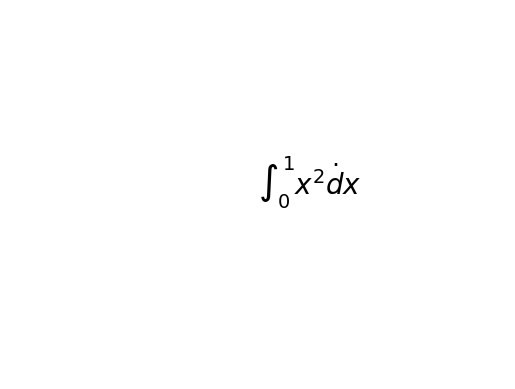

In [ ]:
import matplotlib.pyplot as plt

a = 0
b = 1

plt.text(0.5,0.5,r'$\int_{%s}^{%s} x^2 \.dx$' %(a,b), fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

a = 0
b = 1

plt.text(0.5,0.5,r'$(\begin{array}{l}\dot{y}\end{array}\)$', fontsize=20)
plt.axis('off')
plt.show()

ValueError: 
(\begin{array}{l}\dot{y}\end{array}\)
 ^
ParseFatalException: Expected token, found '\'  (at char 1), (line:1, col:2)

<Figure size 640x480 with 1 Axes>

In [ ]:
print(r"$(\begin{array}{l}\dot{y}\end{array})$")

$(\begin{array}{l}\dot{y}\end{array})$


In [ ]:
# prompt: print this r"$(\begin{array}{l}\dot{y}\end{array})$" latex code in proper format in python

print(r"$\(\begin{array}{l}\dot{y}\end{array})$")


$\(\begin{array}{l}\dot{y}\end{array})$


In [ ]:
from sympy import symbols, Integral

x = symbols('x')
expression = x**2  # Replace this with your desired function f(x)

integral_expression = Integral(expression, x)
print(integral_expression)

Integral(x**2, x)
